# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet, or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 


Following is to show how to plot to a file to save a graph:

In [1]:
# this is how you save a plot to a file
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [144]:
# Read your data here;
#United States Covid Data for September
covid_september = read.csv('us_counties_covid19_september.csv')
# Clean it up, reformat it, filter it, sort it, group it, etc.

#Subet of Missouri Covid Data for September
covid.mo = subset(covid_september, (state=="Missouri"))
covid.mo = mutate(covid.mo, region = tolower(county))

# Missouri counties map
mo_map <- map_data("county","missouri")
mo_map <- mo_map[ ,-5]
names(mo_map)[5] <- 'region'

df = merge(mo_map, covid.mo, by="region", all.x=T)

# Map of the United States
all_states <- map_data("state")

covid2 = mutate(covid_september, region = tolower(state))

# United States Covid Data for April
covid_april = read.csv('us_counties_covid19_april.csv')
covid3 = mutate(covid_april, region = tolower(state))

#Subet of Missouri Covid Data for April
covid.mo2 = subset(covid_september, (state=="Missouri"))
covid.mo2 = mutate(covid.mo, region = tolower(county))


In [152]:
# Total COVID POSITIVE COUNT for the UNITED STATES for the Months of April and September 
total_september = covid_september %>% group_by(state) %>%
    summarize(cases = sum(cases))
covid5 = mutate(total_september, region = tolower(state))

total_april = covid_april %>% group_by(state) %>%
    summarize(cases = sum(cases))
covid4 = mutate(total_april, region = tolower(state))

# Total COVID POSITIVE COUNT for MISSOURI for the Months of April and September 
mo_september = covid.mo2 %>% group_by(county) %>%
    summarize(cases = sum(cases))
covid6 = mutate(mo_september, region = tolower(county))

mo_april = covid.mo %>% group_by(county) %>%
    summarize(cases = sum(cases))
covid7 = mutate(mo_april, region = tolower(county))


In [141]:
# Total COVID DEATH COUNT for the UNITED STATES for the Months of April and September 
total_september = covid_september %>% group_by(state) %>%
    summarize(deaths = sum(deaths))
df1 = mutate(total_september, region = tolower(state))

total_april = covid_april %>% group_by(state) %>%
    summarize(deaths = sum(deaths))
df2 = mutate(total_april, region = tolower(state))


# Total COVID DEATH COUNT for MISSOURI for the Months of April and September 
mo_september = covid.mo2 %>% group_by(county) %>%
    summarize(deaths = sum(deaths))
df3 = mutate(mo_september, region = tolower(county))

mo_april = covid.mo %>% group_by(county) %>%
    summarize(deaths = sum(deaths))
df4 = mutate(mo_april, region = tolower(county))


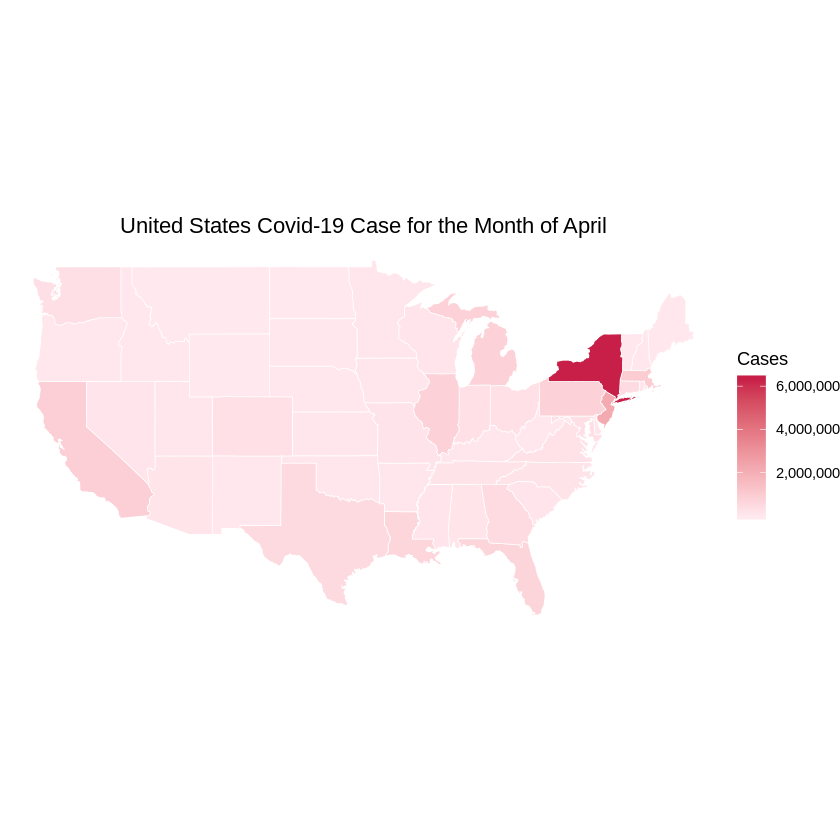

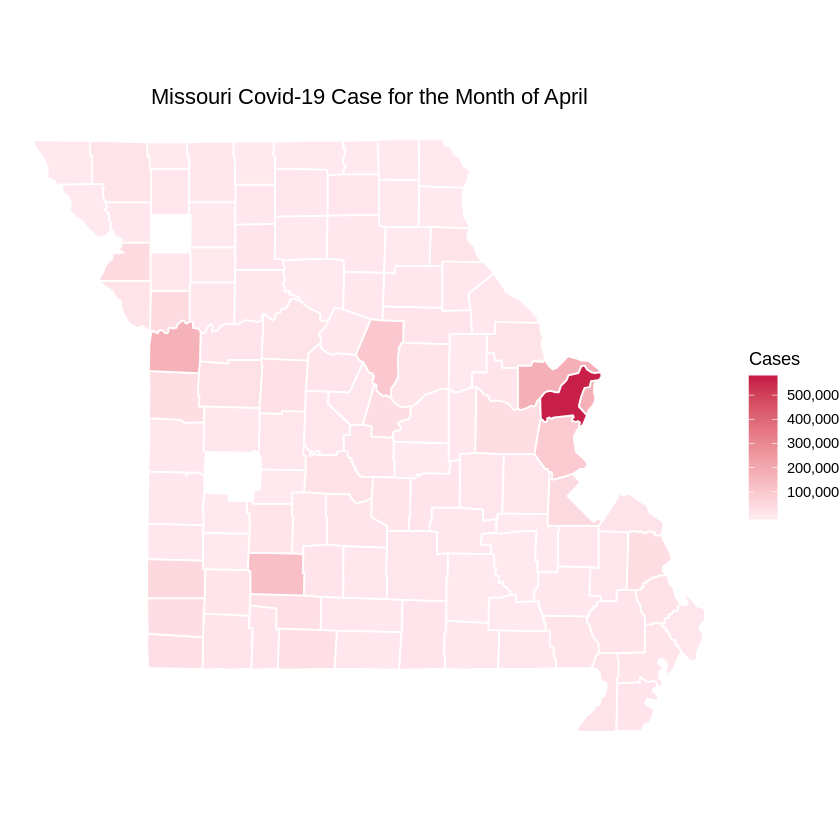

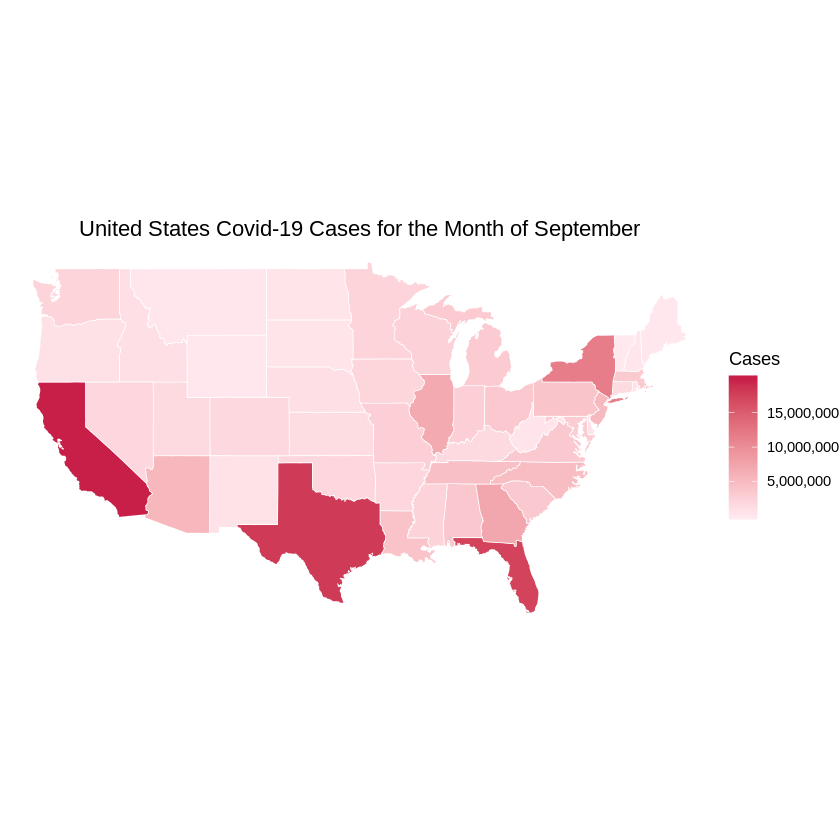

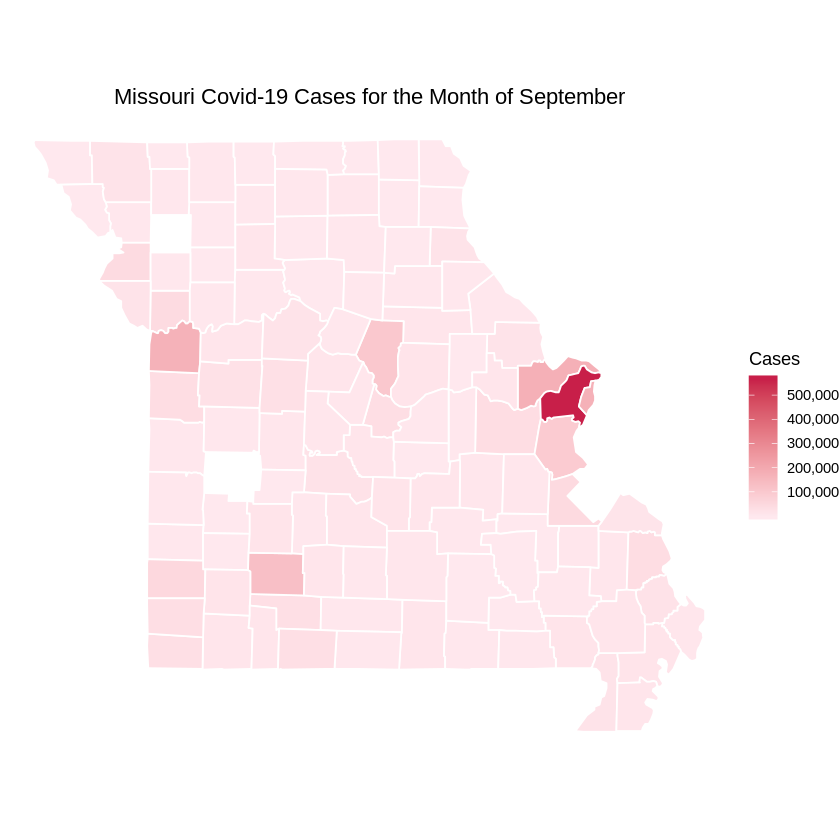

In [154]:
# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
ggplot(data=covid4, aes(fill=cases)) +
geom_map(map=all_states, aes(map_id=region), color="white", size=0.2)+
expand_limits(x = all_states$long, y = all_states$lat) +
scale_fill_continuous(name = "Cases", low = "#ffe8ee", high = "#c81f49", guide = "colorbar", na.value="#eeeeee", label=comma) +
coord_map() + 
theme_void() +
ggtitle("United States Covid-19 Case for the Month of April") +
theme(plot.title = element_text(hjust = 0.5))

ggplot(data=covid7, aes(fill=cases)) +
geom_map(map=mo_map, aes(map_id=region), color="white", size=0.5)+
expand_limits(x = mo_map$long, y = mo_map$lat) +
scale_fill_gradient(name = "Cases", low = "#ffe8ee", high = "#c81f49", guide = "colorbar", na.value="#eeeeee", label=comma) +
coord_map() + 
theme_void() +
ggtitle("Missouri Covid-19 Case for the Month of April") +
theme(plot.title = element_text(hjust = 0.5))

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
ggplot(data=covid5, aes(fill=cases)) +
geom_map(map=all_states, aes(map_id=region), color="white", size=0.2)+
expand_limits(x = all_states$long, y = all_states$lat) +
scale_fill_gradient(name = "Cases", low = "#ffe8ee", high = "#c81f49", guide = "colorbar", na.value="#eeeeee", label=comma) +
coord_map() + 
theme_void() +
ggtitle("United States Covid-19 Cases for the Month of September") +
theme(plot.title = element_text(hjust = 0.5))

ggplot(data=covid6, aes(fill=cases)) +
geom_map(map=mo_map, aes(map_id=region), color="white", size=0.5)+
expand_limits(x = mo_map$long, y = mo_map$lat) +
scale_fill_gradient(name = "Cases", low = "#ffe8ee", high = "#c81f49", guide = "colorbar", na.value="#eeeeee", label=comma) +
coord_map() + 
theme_void() +
ggtitle("Missouri Covid-19 Cases for the Month of September") +
theme(plot.title = element_text(hjust = 0.5))

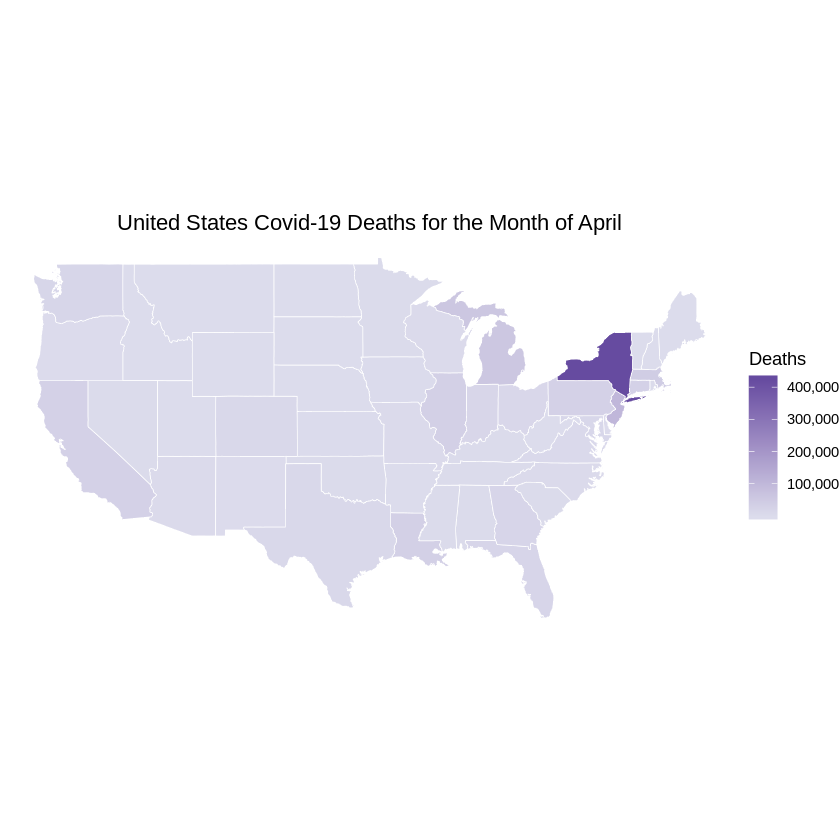

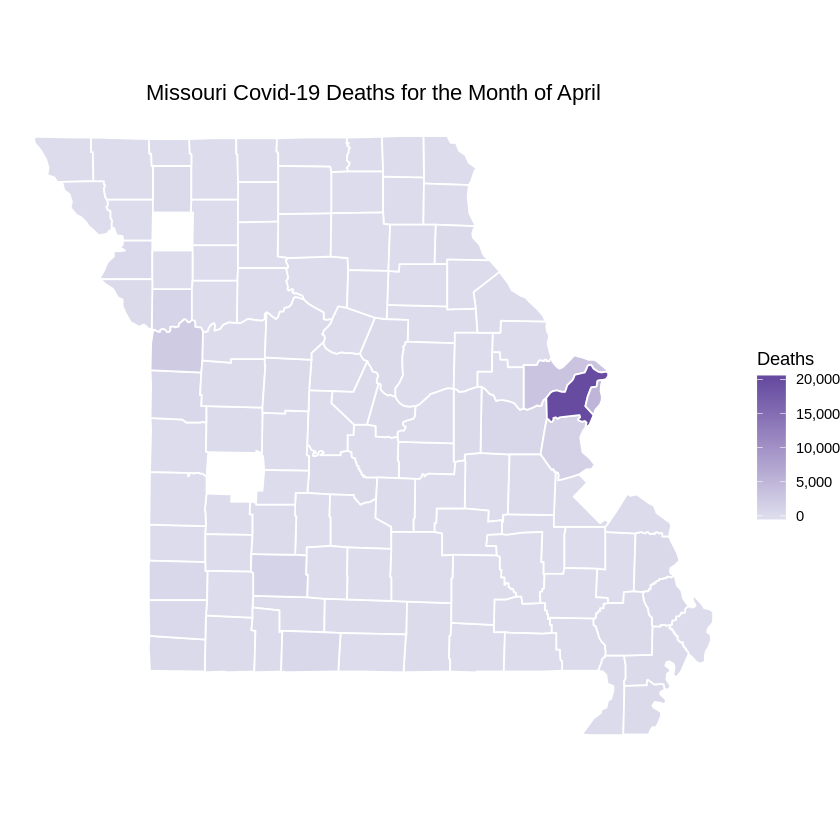

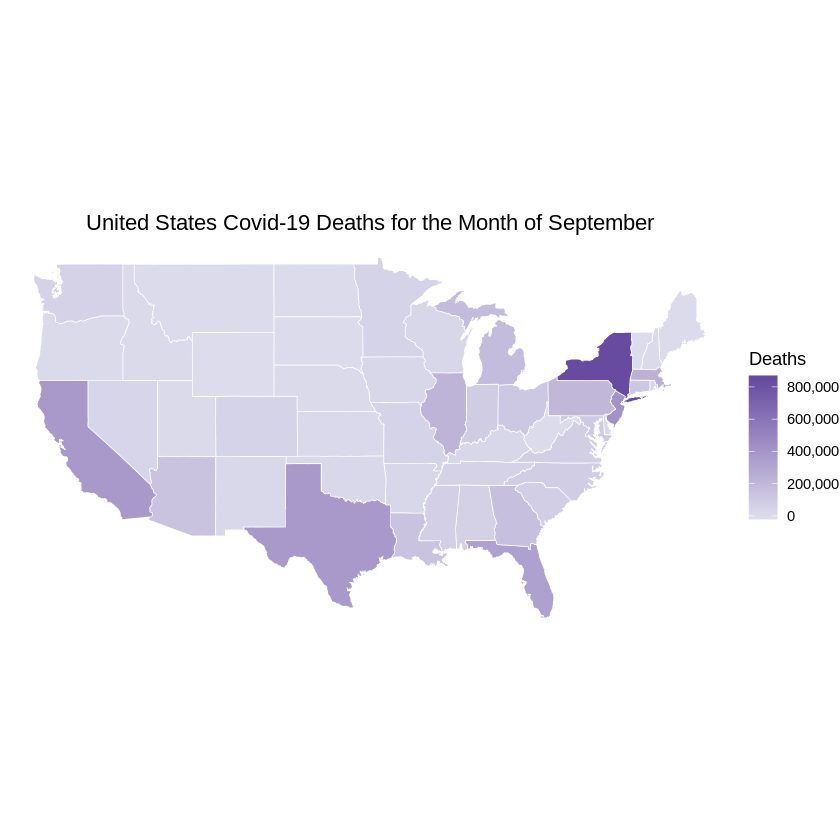

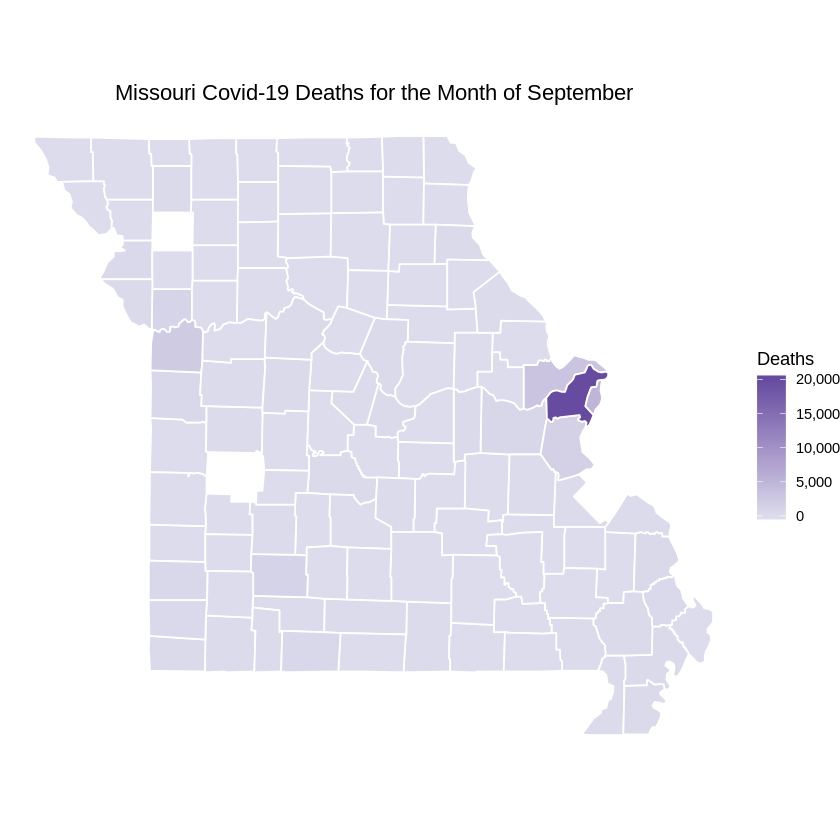

In [147]:
# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
ggplot(data=df2, aes(fill=deaths)) +
geom_map(map=all_states, aes(map_id=region), color="white", size=0.2)+
expand_limits(x = all_states$long, y = all_states$lat) +
scale_fill_continuous(name = "Deaths", low = "#DCDCEC", high = "#664BA0", guide = "colorbar", na.value="#eeeeee", label=comma) +
coord_map() + 
theme_void() +
ggtitle("United States Covid-19 Deaths for the Month of April") +
theme(plot.title = element_text(hjust = 0.5))

ggplot(data=df4, aes(fill=deaths)) +
geom_map(map=mo_map, aes(map_id=region), color="white", size=0.5)+
expand_limits(x = mo_map$long, y = mo_map$lat) +
scale_fill_gradient(name = "Deaths", low = "#DCDCEC", high = "#664BA0", guide = "colorbar", na.value="#eeeeee", label=comma) +
coord_map() + 
theme_void() +
ggtitle("Missouri Covid-19 Deaths for the Month of April") +
theme(plot.title = element_text(hjust = 0.5))

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
ggplot(data=df1, aes(fill=deaths)) +
geom_map(map=all_states, aes(map_id=region), color="white", size=0.2)+
expand_limits(x = all_states$long, y = all_states$lat) +
scale_fill_gradient(name = "Deaths", low = "#DCDCEC", high = "#664BA0", guide = "colorbar", na.value="#eeeeee", label=comma) +
coord_map() + 
theme_void() +
ggtitle("United States Covid-19 Deaths for the Month of September") +
theme(plot.title = element_text(hjust = 0.5))

ggplot(data=df3, aes(fill=deaths)) +
geom_map(map=mo_map, aes(map_id=region), color="white", size=0.5)+
expand_limits(x = mo_map$long, y = mo_map$lat) +
scale_fill_gradient(name = "Deaths", low = "#DCDCEC", high = "#664BA0", guide = "colorbar", na.value="#eeeeee", label=comma) +
coord_map() + 
theme_void() +
ggtitle("Missouri Covid-19 Deaths for the Month of September") +
theme(plot.title = element_text(hjust = 0.5))

---

# Common Pitfalls / Inefficiencies

**Pay attention to the following in your visualizations and stories:**


### Color coordinate among plots so that the same data attributes have the same color in all plots

you can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value. 


### Perceptual grouping is important! group and/or order values

In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

Pie chart: order wedges. 

In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 


### No lengthy text in x axis

Flip the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

at least put them slanted in x axis for better readibility. 


### Plot only those that tell an obvious story

**No crowded** scatter plots with useless linear regression lines that don't tell anything. Look at alternative plots to tell your story.


### If you have too many classes (discrete variables/categories), try to group them 

Instead of giving a color to each of them, you can put them in meaningful groups and color code.

For sequential variables, you can do the same thing by binning. 

Stepped color palettes may be more useful than smooth sequential palettes (especially for comparison in choropleth maps).

You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 


### ANNOTATE!

**Tell** your audience what they are supposed to see. 

Use meaningful titles with a message, not dry titles. 

Use nice and concise axis labels. 

Use text annotations (look at the **examples in the lab notebook**).



### THEMING!

**Good looking** charts are more **convincing**. 

**Almost NEVER use the default color palette, default theme, default font.**


Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 



### Use space wisely!

**Balance the plots** to use space effectively.

Pay attention to data-ink ratio.

HAVE A FLOW left to right, top to bottom. 


